## Importing Libraries

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

## Importing dataset

In [42]:
df = pd.read_csv('train.csv')

In [43]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

Let's check if there are null values  in our dataset

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Let's visually find out the null values

Text(0.5, 1.0, 'Heatmap showing null values in dataset')

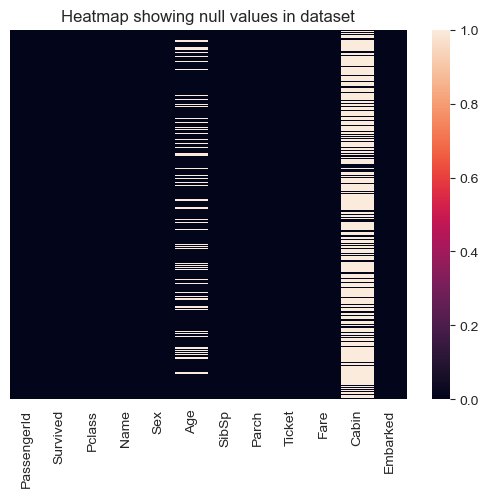

In [45]:
sns.heatmap(df.isna(), yticklabels = False  )
plt.title("Heatmap showing null values in dataset")

Only age and cabin mobile has null values in which age column has about 15% null values. Cabin has more than 70% null values and it is categorical data. So, in this case, we can convert this column to contain labels 1 and 0, where 0 means unknown cabin, and 1 means known cabin

### Lets fill missing values

lets fill the missing values in cabin column in the way mentioned before

In [46]:
def fill_missing(col):
    if pd.isnull(col):
        return 0
    else:
        return 1


In [47]:
 df['Cabin'] = df['Cabin'].apply(fill_missing)

In [48]:
df['Cabin'].value_counts()

0    687
1    204
Name: Cabin, dtype: int64

To fill missing values in age column. Let's first find relationship between the columns to fill the appropriate values in age column

## Visualizing the Data

In [49]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


Lets first find the number of survived people

([<matplotlib.axis.XTick at 0x1ebe12ab100>,
 [Text(0, 0, 'Dead'), Text(1, 0, 'Alive')])

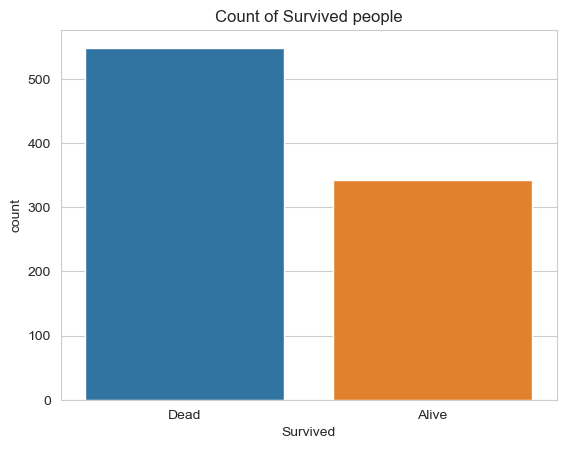

In [50]:
sns.set_style('whitegrid')
g = sns.countplot(data =df, x = 'Survived')
plt.title('Count of Survived people')
plt.xticks([0,1],['Dead' , 'Alive'])


Let's find the relationship between survival and sex

Text(0.5, 1.0, 'Count of Survived people based upon sex')

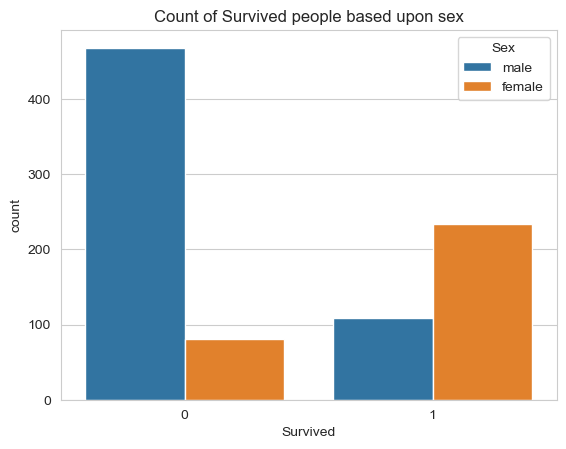

In [51]:
sns.set_style('whitegrid')
g = sns.countplot(data =df, x = 'Survived' , hue = 'Sex')
plt.title('Count of Survived people based upon sex')

Majority of female survived

Let's find the relationship between Survival and Passenger Class

Text(0.5, 1.0, 'Relation between survival and passenger class')

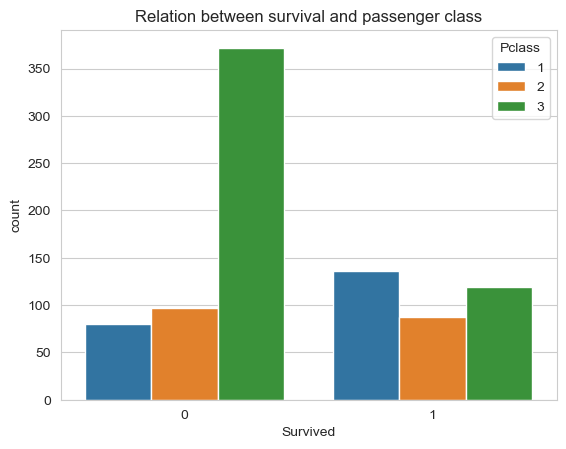

In [52]:
sns.countplot(data = df, x = 'Survived' , hue = 'Pclass')
plt.title('Relation between survival and passenger class')

Majority of 1st class passengers survived

Let's find the Age Distribution

Text(0.5, 1.0, 'Age Distribution')

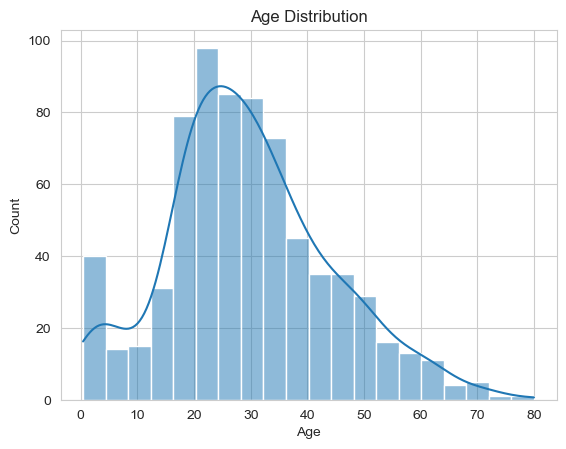

In [53]:
sns.histplot(data = df['Age'].dropna() , kde = True)
plt.title("Age Distribution")

Age is uniformly distributed with mean of around 25

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

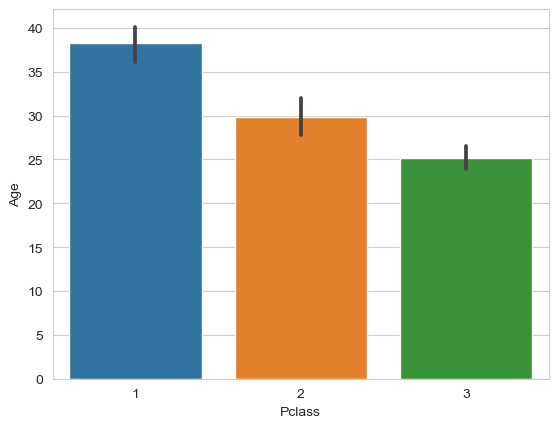

In [54]:
sns.barplot(data = df, x = 'Pclass' , y = 'Age')

Different passenger class has different mean. So, let's check the outliers first and then, we will fill the missing values in age columns 

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

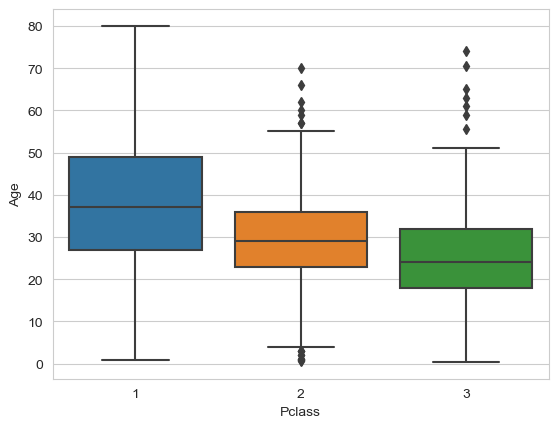

In [55]:
sns.boxplot(data = df, y = 'Age' , x = 'Pclass' , )

As, there are some outliers in 2nd and 3rd class passengers, it is better to replace null values with median

In [56]:
def fill_null(cols):
    age = cols[0]
    pClass = cols[1]
    if pd.isnull(age):
        if pClass == 1:
            return 37
        elif pClass == 2:
            return 29
        else:
            return 25
    else:
        return age

In [57]:
 df['Age'] =df[['Age' , 'Pclass']].apply(fill_null , axis = 1)

Cross Checking the missing values

Text(0.5, 1.0, 'Checking the null values')

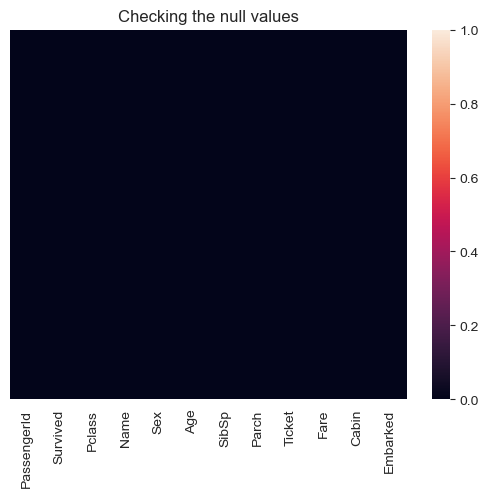

In [58]:
sns.heatmap(df.isna() , yticklabels = False)
plt.title('Checking the null values')

No null values

Now, lets see what other relationship can me drawn

In [59]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


Text(0.5, 1.0, 'Number of Siblings and Spouses')

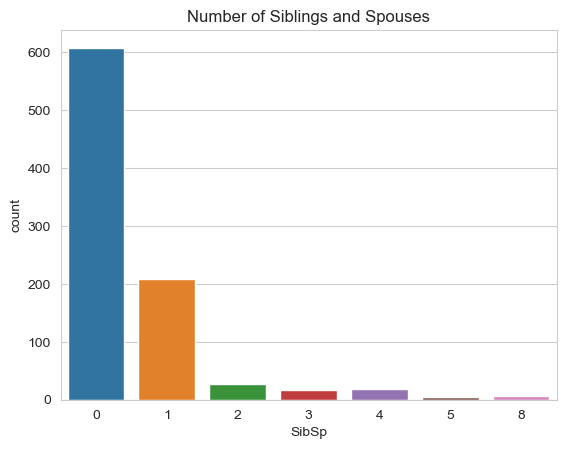

In [60]:
sns.countplot(data = df, x = 'SibSp')
plt.title('Number of Siblings and Spouses')

Text(0.5, 1.0, 'Number of Parents and Children')

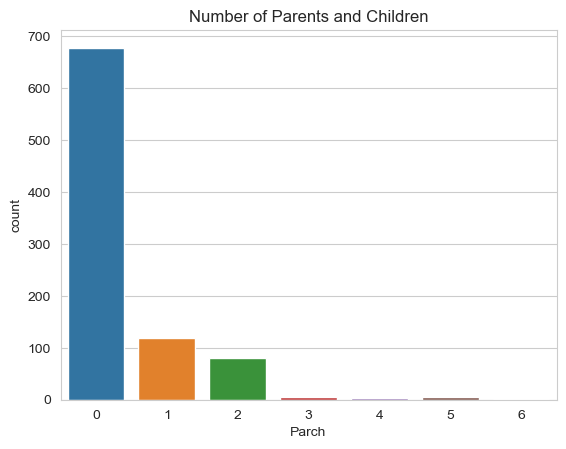

In [61]:
sns.countplot(data = df, x = 'Parch')
plt.title('Number of Parents and Children')

Majority of the passesngers are travelling alone

### Now, lets see the distribution of Fare

Text(0.5, 1.0, 'Fare Distribution')

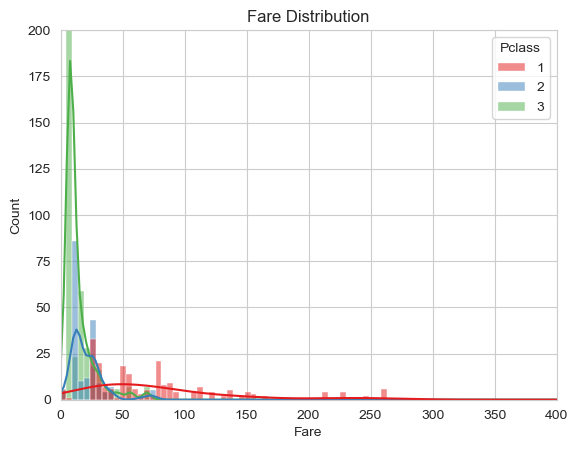

In [62]:
sns.histplot(data = df, x = 'Fare' , kde = True , hue = 'Pclass' , palette = 'Set1')
plt.ylim(0,200)
plt.xlim(0,400)
plt.title("Fare Distribution")

Price of 1st passenger class is high in comparison to 2nd and 3rd class

Lastly, let's check the correlation between the numerical datas

Text(0.5, 1.0, 'Correlation using Heatmap')

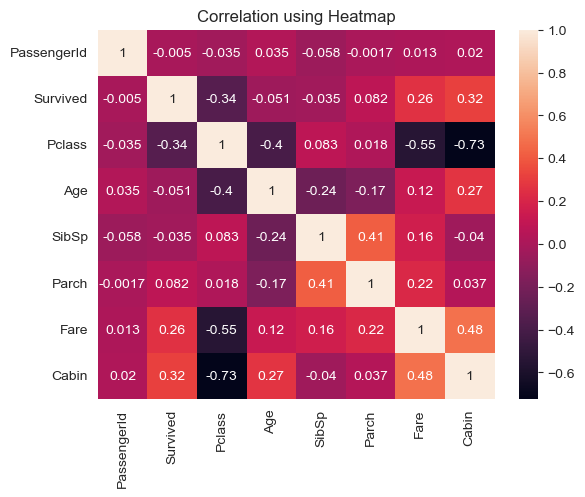

In [63]:
sns.heatmap(df.corr(), annot = True , cmap = 'rocket')
plt.title('Correlation using Heatmap')

From this correlation matrix, we can say that age and Pclass are highly negatively correlated and Cabin and age are little positively correlated. This is because of the fact that, as previously visualized, age of 2nd, 3rd class passenger tends to have lower age. 

## Converting Categorical data

In [64]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [65]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [102]:
ohe = ColumnTransformer( [
    ('drop_cols' , 'drop' , ['PassengerId' , "Name" , "Ticket"]),
    ('oneHotEncoder' , OneHotEncoder(sparse = False , handle_unknown = 'ignore' , drop = 'first') , ['Sex' ,'Embarked'])
] , remainder = 'passthrough')

In [103]:
ohe.fit_transform(df)

array([[ 1.    ,  0.    ,  1.    , ...,  0.    ,  7.25  ,  0.    ],
       [ 0.    ,  0.    ,  0.    , ...,  0.    , 71.2833,  1.    ],
       [ 0.    ,  0.    ,  1.    , ...,  0.    ,  7.925 ,  0.    ],
       ...,
       [ 0.    ,  0.    ,  1.    , ...,  2.    , 23.45  ,  0.    ],
       [ 1.    ,  0.    ,  0.    , ...,  0.    , 30.    ,  1.    ],
       [ 1.    ,  1.    ,  0.    , ...,  0.    ,  7.75  ,  0.    ]])

Drop the columns and apply Normalization

In [104]:
scale = ColumnTransformer([
    
    ('scaler' , StandardScaler(), slice(0,df.shape[1]))
] , remainder = 'passthrough')

In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:
lg = LogisticRegression(max_iter = 10000)

## Making pipeline

In [107]:
pipe = Pipeline([
    ('ohe', ohe),
    ('scale', scale ),
    ('model' , lg)
    
])

## Train Test split

In [108]:
xtrain, xtest, ytrain, ytest = train_test_split(df.drop(['Survived'] , axis = 1) , df['Survived'] , test_size = 0.3 , random_state = 42)

## Fitting the model

In [109]:
from sklearn import set_config
set_config(display = 'diagram')

In [110]:
pipe.fit(xtrain, ytrain)

Pipeline(steps=[('ohe',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop_cols', 'drop',
                                                  ['PassengerId', 'Name',
                                                   'Ticket']),
                                                 ('oneHotEncoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Sex', 'Embarked'])])),
                ('scale',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  slice(0, 12, None))])),
                ('model', LogisticRegression(max_iter=10000))])

## Predict

In [111]:
predictions = pipe.predict(xtest)

In [112]:
from sklearn.metrics import confusion_matrix

In [113]:
confusion_matrix(ytest, predictions)

array([[138,  19],
       [ 28,  83]], dtype=int64)

In [114]:
from sklearn.metrics import accuracy_score

In [115]:
accuracy = accuracy_score(ytest, predictions)
accuracy

0.8246268656716418

In [118]:
import pickle
pickle.dump(pipe, open('pipe.pkl', 'wb'))